In [130]:
import pprint
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

## The Base Class

In [131]:
class Market():
    def __init__(self):
        self.book = OrderBook()

    def bid(
        self,
        unit,
        price,
        user_id
    ):
        self.book.add_bid(unit, price, user_id)

    def ask(
        self,
        unit,
        price,
        user_id
    ):
        self.book.add_ask(unit, price, user_id)

    def run(self):
        pass

    def plot(self):
        self.book.plot_curves()

## Bid-Frame

In [132]:
# Utility
def cumu_sum(units):
    total = 0
    for u in units:
        total += u
        yield total

class OrderBook():
    # Unit, Price, Type, User_id
    col_names = [
        'Unit',
        'Price',
        'Type',
        'User'
    ]

    def __init__(self):
        self.orders = pd.DataFrame(columns=self.col_names)

    def add_bid(
        self,
        unit,
        price,
        user_id
    ):
        new_bid = pd.DataFrame([[unit, price, 'bid', user_id]], columns=self.col_names)
        self.orders = pd.concat([self.orders, new_bid], ignore_index=True)

    def add_ask(
        self,
        unit,
        price,
        user_id
    ):
        new_ask = pd.DataFrame([[unit, price, 'ask', user_id]], columns=self.col_names)
        self.orders = pd.concat([self.orders, new_ask], ignore_index=True)

    def display(self, scale=0):
        if scale == 0:
            return self.orders
        elif scale == 1:
            retur[self.orders['Type'] == 'bid']
        else:
            return self.orders[self.orders['Type'] == 'ask']

    def _get_demand_curve(self):
        # {price : units}
        bids = self.orders[self.orders['Type'] == 'bid']
        bid_curves = bids.groupby('Price')['Unit'].sum().reset_index()

        return bid_curves.sort_values(by=['Price'], ascending=False).to_numpy()

    def _get_supply_curve(self):
        # {price : units}
        asks = self.orders[self.orders['Type'] == 'ask']
        ask_curves = asks.groupby('Price')['Unit'].sum().reset_index()

        return ask_curves.sort_values(by=['Price']).to_numpy()
        

    def plot_curves(self):
        demand_curve = self._get_demand_curve().tolist()
        supply_curve = self._get_supply_curve().tolist()

        demand_units = [unit for price, unit in demand_curve]
        demand_prices = [price for price, unit in demand_curve]
        cumulative_demand = [0] + list(cumu_sum(demand_units))
    
        supply_units = [unit for price, unit in supply_curve]
        supply_prices = [price for price, unit in supply_curve]
        cumulative_supply = [0] + list(cumu_sum(supply_units))
    
        demand_prices = demand_prices + [demand_prices[-1]]
        supply_prices = supply_prices + [supply_prices[-1]]

        plt.figure(figsize=(7, 4), dpi=450)
        
        plt.step(cumulative_demand, demand_prices, label='Demand', where='post', 
                 color='#1f77b4', linewidth=2.5, alpha=0.8)
        plt.step(cumulative_supply, supply_prices, label='Supply', where='post', 
                 color='#ff7f0e', linewidth=2.5, alpha=0.8)
    
        plt.title('Demand & Supply Curves', fontsize=14, fontweight='bold')
        plt.xlabel('Quantity', fontsize=12)
        plt.ylabel('Price', fontsize=12)
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), frameon=True, fontsize=10, ncol=2)
        plt.grid(True, linestyle='--', alpha=0.6)
    
        # Show the plot
        plt.tight_layout()
        plt.show()

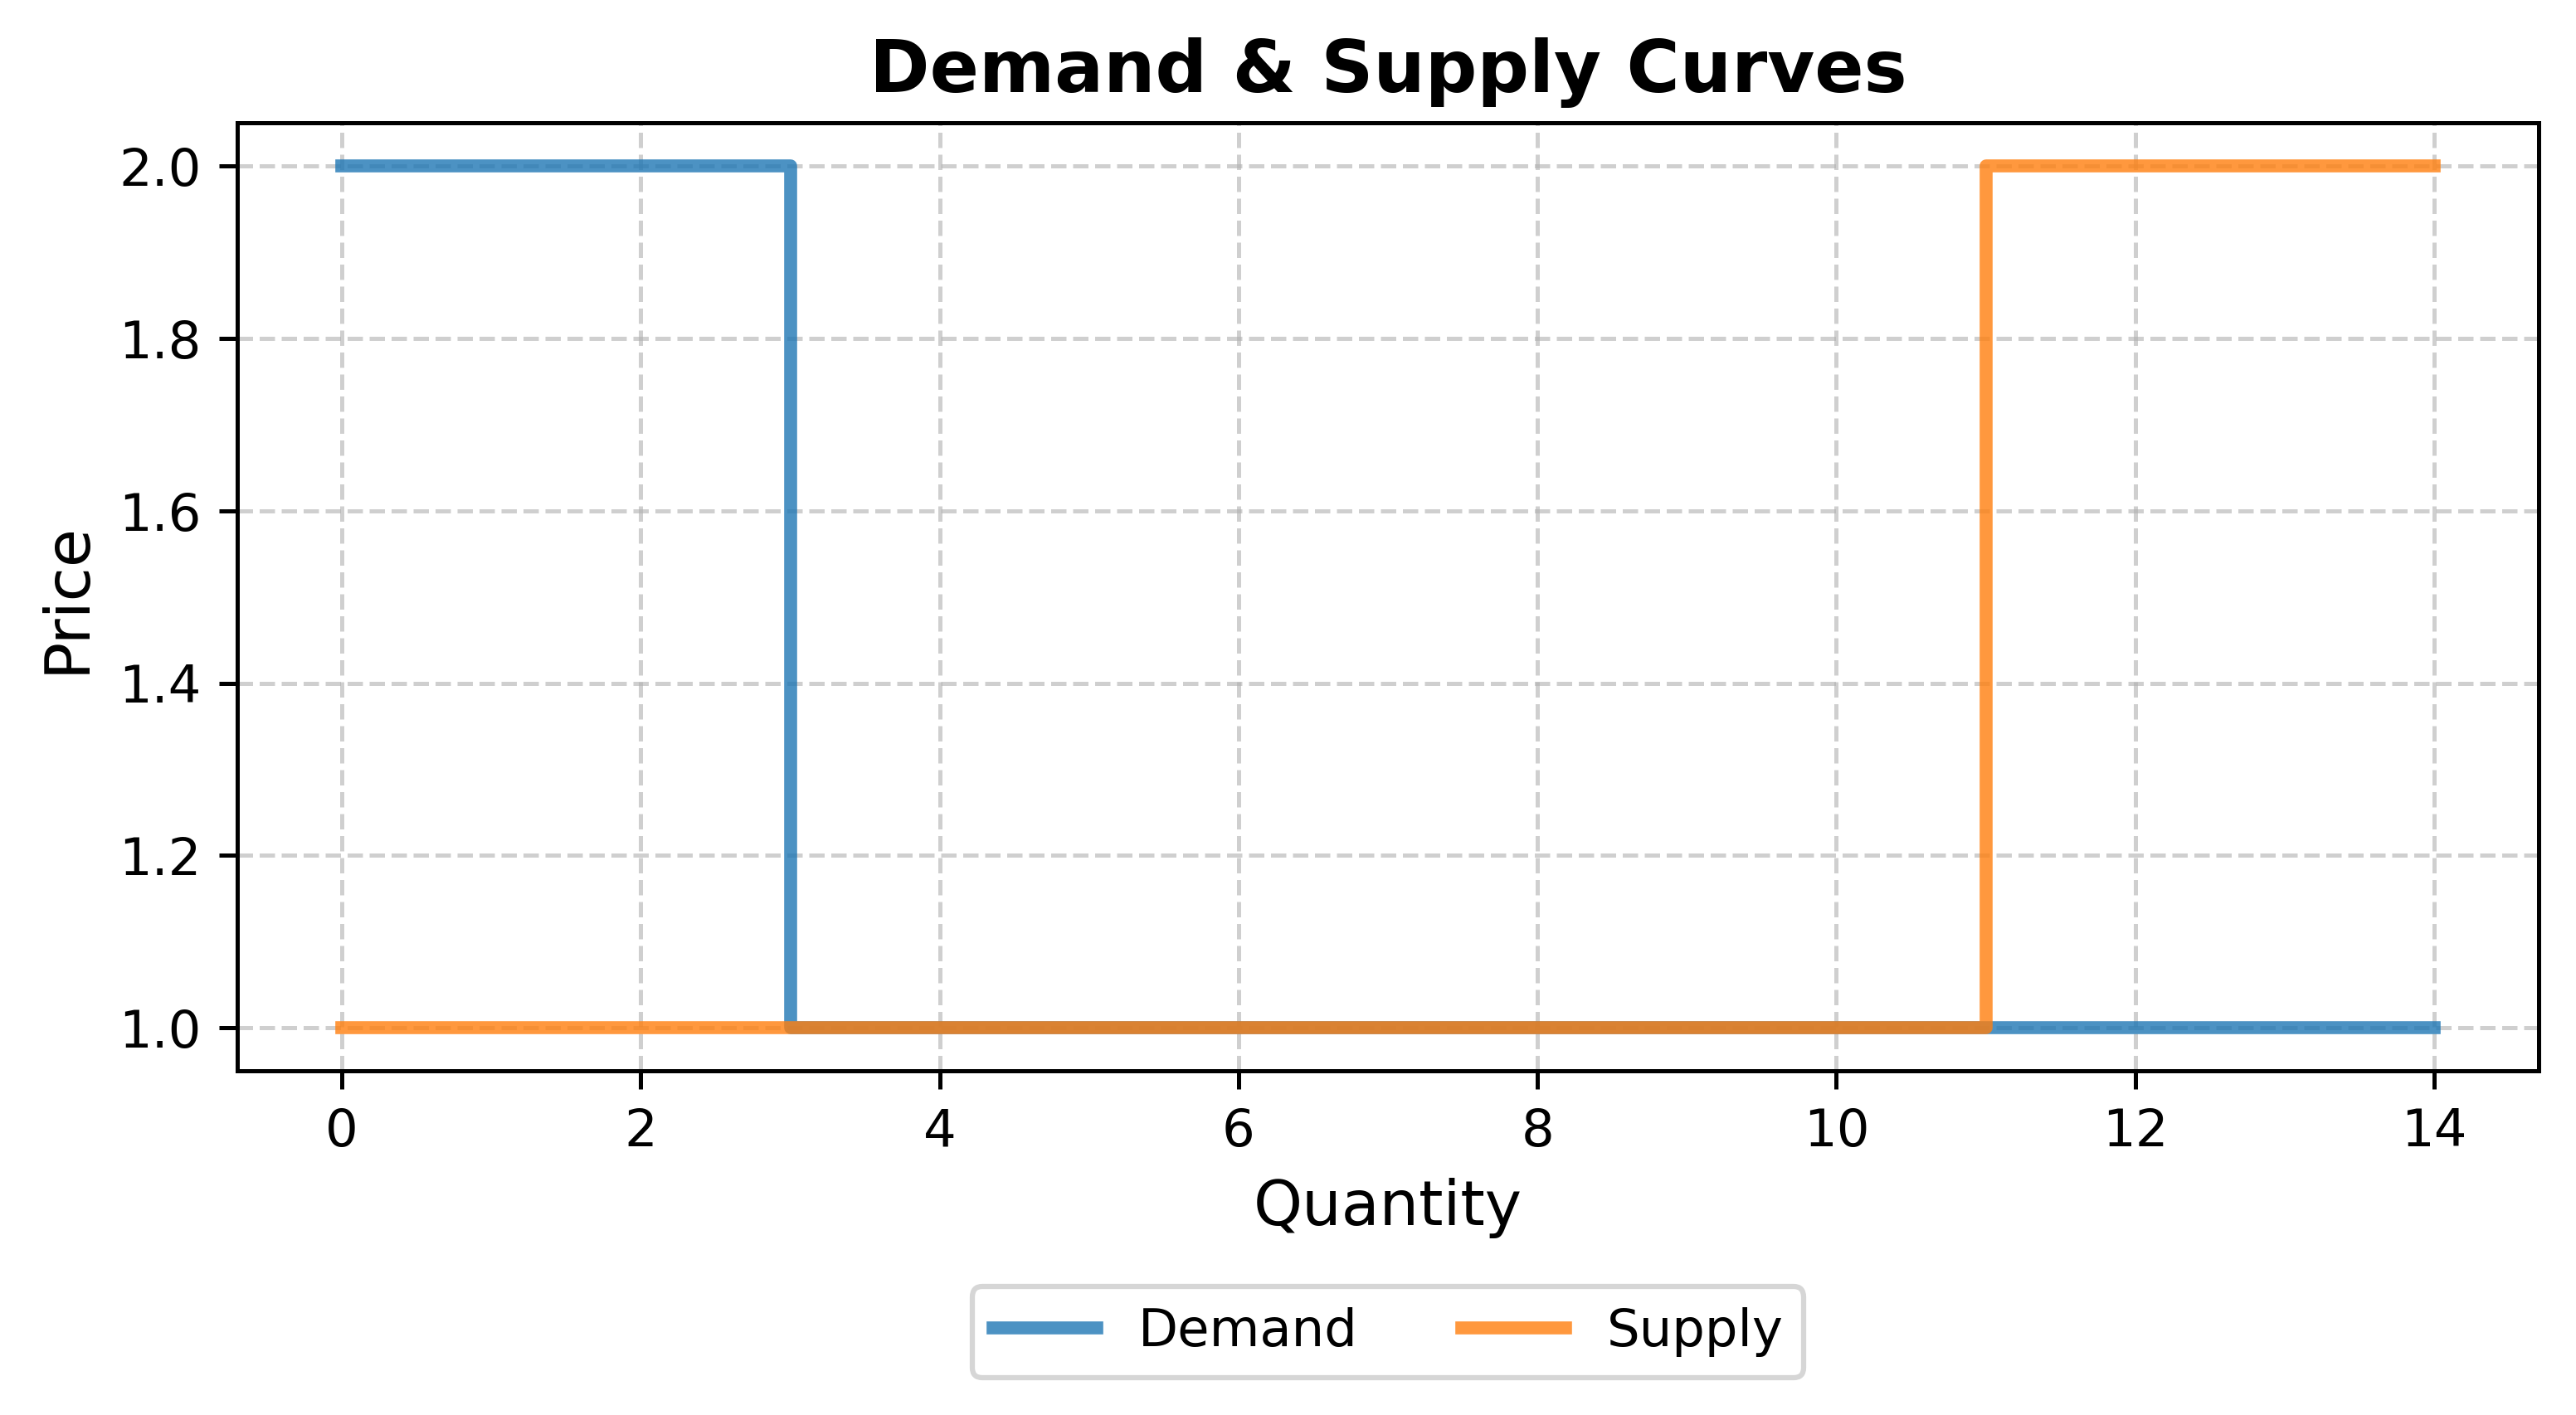

In [135]:
M = Market()

# Ask
M.ask(10, 1, 0)
M.ask(1, 1, 0)
M.ask(3, 2, 0)

# Bid
M.bid(10, 1, 0)
M.bid(1, 1, 0)
M.bid(3, 2, 0)

# Plot
M.plot()